## Importing Libraries and Dependencies

In [13]:
import pandas_datareader as web
import pandas as pd

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")

## Reading the data from our own database and 

In [2]:
# Reading the stocks_adj_close.csv
stocks = pd.read_csv("stocks_adj_close.csv", index_col = [0], parse_dates = [0])
stocks.head()

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,20.212959,5.005957,38.204258,6.556002,21.944105,8.53,19.541143,33.440731,37.700001,23.353294,...,54.343533,10.921253,44.515923,13.767320,43.354267,32.236305,19.832848,55.126549,28.620001,11.989312
2010-01-06,20.141132,4.798553,38.537392,6.451722,21.736618,8.40,19.649664,33.796230,37.619999,23.308983,...,55.218395,10.800494,43.932014,13.793758,43.728977,32.448696,19.691063,55.108730,28.400000,13.031859
2010-01-07,20.115025,4.939965,38.527885,6.439793,21.388027,8.40,19.812443,33.764637,36.889999,23.124338,...,55.055607,10.752194,44.870220,13.734278,43.591568,32.873447,19.685392,56.372948,27.690001,14.491426
2010-01-08,20.108498,4.845692,38.680153,6.482608,21.620420,8.23,19.913734,33.630333,36.689999,23.257278,...,54.994576,10.653171,44.548729,13.740885,43.416698,32.873447,19.691063,55.188862,27.600000,14.256856
2010-01-11,20.121552,4.751417,38.299461,6.425420,21.861111,8.08,20.015026,33.598728,36.209999,23.124338,...,55.543922,10.723213,44.404385,13.873072,43.903835,33.298229,20.031342,56.408539,27.690001,14.343733


In [3]:
# Getting the tickers list
tickers = list(stocks.columns)

## Pulling the data for S&P 500 for Comparison

In [4]:
start = '2010-01-01'
end = '2022-04-08'

# Load sp500_df return data for comparing the returns of individual stocks
sp500_df = web.DataReader('^GSPC', 'yahoo', start, end)
sp500_df['Percent Change'] = sp500_df['Adj Close'].pct_change()
sp500_return = (sp500_df['Percent Change'] + 1).cumprod()[-1]

## Picking Best Performers

In [5]:
# Lets figure out the best performers by comparing with the spy returns
# We will assign
return_list = []
for ticker in tickers:
    df = stocks[ticker]
    df['Percent Change'] = df.pct_change()
    stock_return = ((df['Percent Change'] + 1).cumprod())[-1]
    returns_compared = round((stock_return / sp500_return),2)
    return_list.append(returns_compared)

In [6]:
best_performers = pd.DataFrame(list(zip(tickers, return_list)), columns = ['Ticker', 'Returns Compared'])
best_performers

,Ticker,Returns Compared
0,A,1.70
1,AAL,0.85
2,AAP,1.44
3,AAPL,6.63
4,ABC,1.87
...,...,...
437,XRAY,0.38
438,YUM,1.53
439,ZBH,0.59
440,ZBRA,3.69


In [7]:
# Showing the ranking in percentile form
best_performers['Score'] = best_performers['Returns Compared'].rank(pct = True)*100
best_performers.head()

,Ticker,Returns Compared,Score
0,A,1.70,62.443439
1,AAL,0.85,23.868778
2,AAP,1.44,51.809955
3,AAPL,6.63,97.285068
4,ABC,1.87,67.307692


In [8]:
# Setting the condition of picking the stocks which are in top 70% quantile 
# We can do the same thing with sharpe ratio and other factors
best_performers = best_performers[best_performers['Score'] >= (best_performers['Score'].quantile(0.70))]

In [9]:
best_performers.sort_values(by = 'Score', ascending = False)

,Ticker,Returns Compared,Score
136,DXCM,14.89,100.000000
295,NVDA,14.18,99.773756
128,DPZ,13.62,99.547511
285,NFLX,12.42,99.321267
43,AVGO,10.61,99.095023
...,...,...,...
41,ATVI,2.00,70.814480
430,WRB,1.99,70.588235
86,CINF,1.98,70.361991
107,CSX,1.96,70.022624


In [10]:
len(best_performers)

134

In [11]:
best_performers.to_csv('best_performers.csv', index = None)

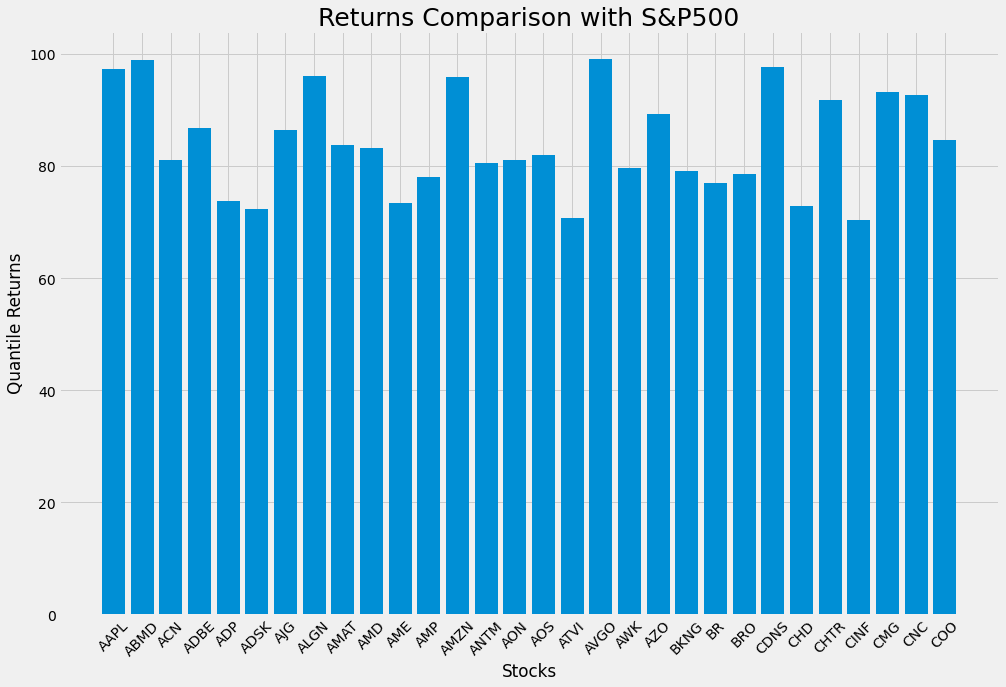

In [14]:
plt.figure(figsize = (15, 10))
plt.bar(best_performers['Ticker'][0:30], best_performers['Score'][0:30])
plt.title('Returns Comparison with S&P500', fontsize = 25)
plt.xticks(rotation = 45)
plt.xlabel("Stocks")
plt.ylabel("Quantile Returns")
plt.savefig('figures/Returns_comparisons_30.png')
plt.savefig('figures/Returns_comparisons_30.pdf')
plt.show()